In [24]:
#!pip install yfinance

In [25]:
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

start_date = datetime.now() - pd.DateOffset(months=3)
end_date = datetime.now()

tickers = ['AAPL', 'MSFT', 'NFLX', 'GOOG']

df_list = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)

df = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
print(df.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                         Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
AAPL   2024-03-01  179.550003  180.529999  177.380005  179.660004  179.416656   
       2024-03-04  176.149994  176.899994  173.789993  175.100006  174.862823   
       2024-03-05  170.759995  172.039993  169.619995  170.119995  169.889572   
       2024-03-06  171.059998  171.240005  168.679993  169.119995  168.890915   
       2024-03-07  169.149994  170.729996  168.490005  169.000000  168.771088   

                     Volume  
Ticker Date                  
AAPL   2024-03-01  73488000  
       2024-03-04  81510100  
       2024-03-05  95132400  
       2024-03-06  68587700  
       2024-03-07  71765100  


In [26]:
df = df.reset_index()
print(df.head())

  Ticker       Date        Open        High         Low       Close  \
0   AAPL 2024-03-01  179.550003  180.529999  177.380005  179.660004   
1   AAPL 2024-03-04  176.149994  176.899994  173.789993  175.100006   
2   AAPL 2024-03-05  170.759995  172.039993  169.619995  170.119995   
3   AAPL 2024-03-06  171.059998  171.240005  168.679993  169.119995   
4   AAPL 2024-03-07  169.149994  170.729996  168.490005  169.000000   

    Adj Close    Volume  
0  179.416656  73488000  
1  174.862823  81510100  
2  169.889572  95132400  
3  168.890915  68587700  
4  168.771088  71765100  


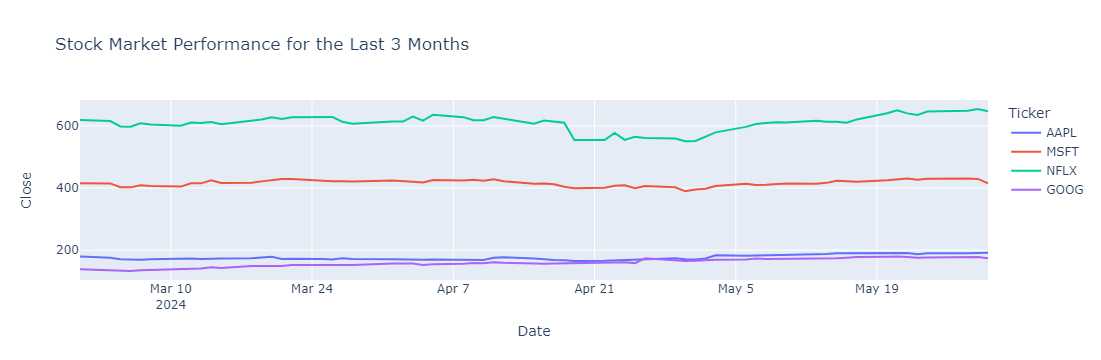

In [27]:
import plotly.express as px
fig = px.line(df, x='Date', 
              y='Close', 
              color='Ticker', 
              title="Stock Market Performance for the Last 3 Months")
fig.show()

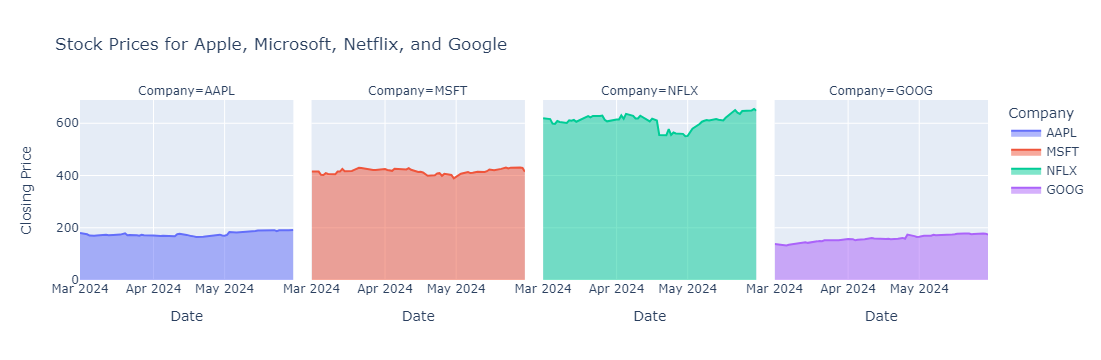

In [28]:
fig = px.area(df, x='Date', y='Close', color='Ticker',
              facet_col='Ticker',
              labels={'Date':'Date', 'Close':'Closing Price', 'Ticker':'Company'},
              title='Stock Prices for Apple, Microsoft, Netflix, and Google')
fig.show()

In [29]:
df['MA10'] = df.groupby('Ticker')['Close'].rolling(window=10).mean().reset_index(0, drop=True)
df['MA20'] = df.groupby('Ticker')['Close'].rolling(window=20).mean().reset_index(0, drop=True)

for ticker, group in df.groupby('Ticker'):
    print(f'Moving Averages for {ticker}')
    print(group[['MA10', 'MA20']])

Moving Averages for AAPL
          MA10        MA20
0          NaN         NaN
1          NaN         NaN
2          NaN         NaN
3          NaN         NaN
4          NaN         NaN
..         ...         ...
58  188.735999  182.881001
59  189.428998  183.915000
60  189.799998  184.739500
61  190.085999  185.737500
62  190.242998  186.837000

[63 rows x 2 columns]
Moving Averages for GOOG
           MA10        MA20
189         NaN         NaN
190         NaN         NaN
191         NaN         NaN
192         NaN         NaN
193         NaN         NaN
..          ...         ...
247  175.077997  172.278999
248  175.681998  172.410999
249  176.393999  172.917000
250  176.940999  173.555000
251  176.908998  173.954499

[63 rows x 2 columns]
Moving Averages for MSFT
           MA10        MA20
63          NaN         NaN
64          NaN         NaN
65          NaN         NaN
66          NaN         NaN
67          NaN         NaN
..          ...         ...
121  422.119995  413.21

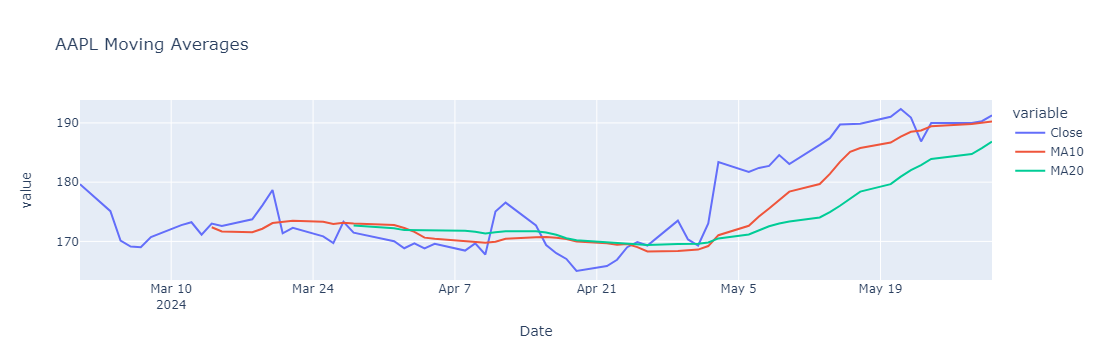

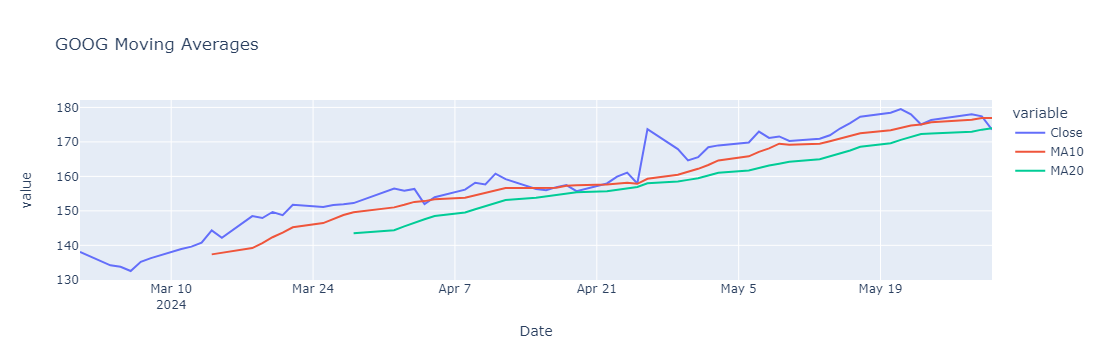

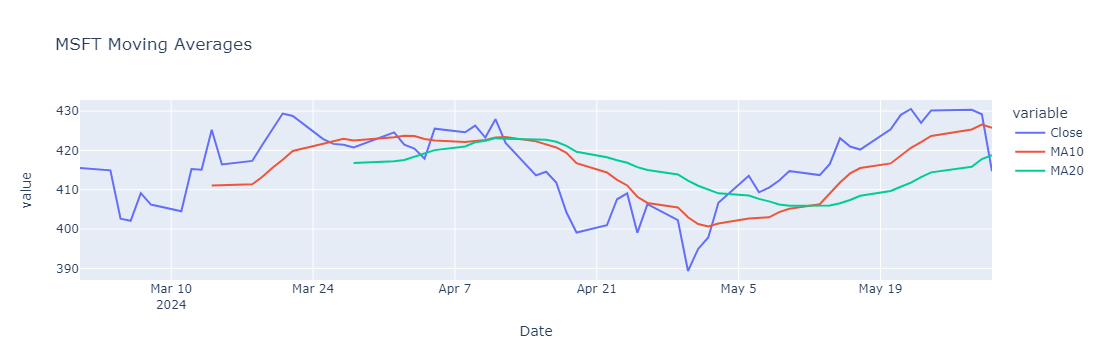

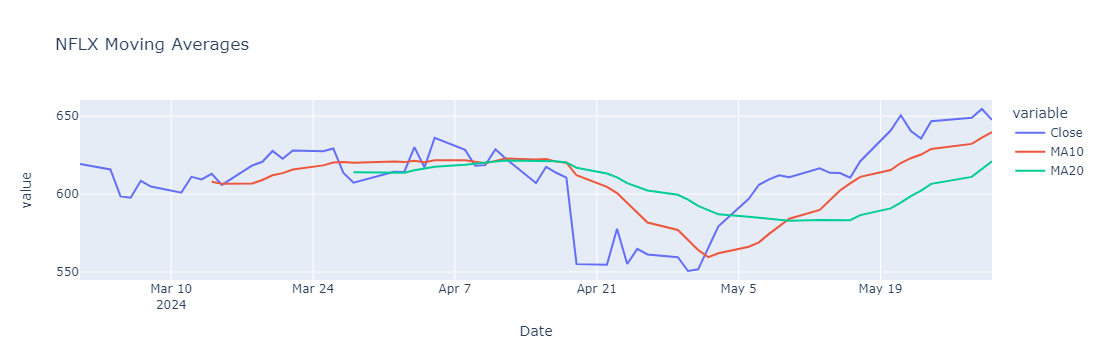

In [30]:
for ticker, group in df.groupby('Ticker'):
    fig = px.line(group, x='Date', y=['Close', 'MA10', 'MA20'], 
                  title=f"{ticker} Moving Averages")
    fig.show()

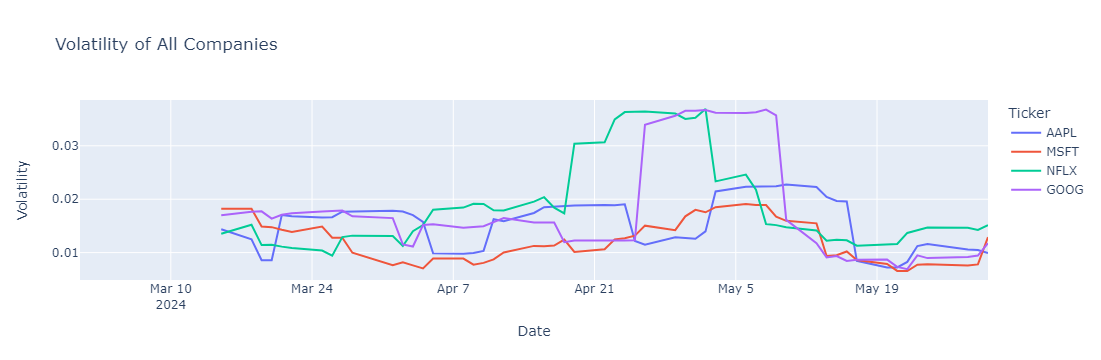

In [31]:
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)
fig = px.line(df, x='Date', y='Volatility', 
              color='Ticker', 
              title='Volatility of All Companies')
fig.show()

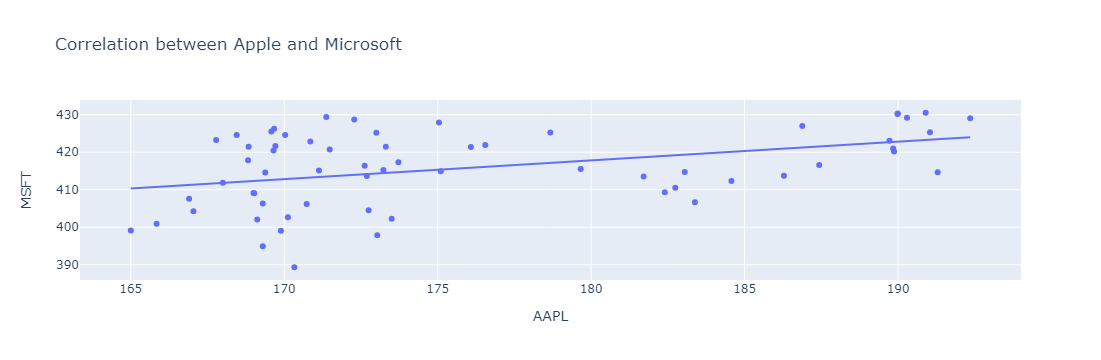

In [32]:
# create a DataFrame with the stock prices of Apple and Microsoft
apple = df.loc[df['Ticker'] == 'AAPL', ['Date', 'Close']].rename(columns={'Close': 'AAPL'})
microsoft = df.loc[df['Ticker'] == 'MSFT', ['Date', 'Close']].rename(columns={'Close': 'MSFT'})
df_corr = pd.merge(apple, microsoft, on='Date')

# create a scatter plot to visualize the correlation
fig = px.scatter(df_corr, x='AAPL', y='MSFT', 
                 trendline='ols', 
                 title='Correlation between Apple and Microsoft')
fig.show()